In [32]:
import matplotlib.pyplot as plt
%matplotlib widget
import os
import pandas as pd

ROOT_DIR = os.popen('git rev-parse --show-toplevel').read().strip()


In [33]:
# Read the last log folder path from last_log.txt

with open(f"{ROOT_DIR}/last_log.txt", "r") as file:
     last_folder_path = file.read().strip()

folder_path = last_folder_path if os.path.exists(last_folder_path) else print(f"Last log folder path '{last_folder_path}' does not exist.")
log_name = folder_path.split("/")[-1]

print(log_name)

df = pd.read_csv(f"{folder_path}/{log_name}_log.csv")
df

q_feedback_pyramid_fault_friction_coef_fault


,Unnamed: 0,time,T_sat_x,dw_sat_x,w_sat_x,T_dist_x,T_sat_y,dw_sat_y,w_sat_y,T_dist_y,...,q_sat_error_x,q_sat_error_y,q_sat_error_z,q_sat_error_w,euler_axis_sat_error,euler_axis_sat_error_deg,f_wheels_error_0,f_wheels_error_1,f_wheels_error_2,f_wheels_error_3
0,0,0.00,-45.311505,-0.078216,0.000000,0.000508,21.295929,0.004812,0.000000,-0.000508,...,0.500002,-0.300001,-0.400002,0.707103,1.570806,90.000549,0.0,0.0,0.0,0.0
1,1,0.01,-45.311505,-0.078216,-0.000805,0.000508,21.295929,0.004812,0.000050,-0.000508,...,0.500004,-0.300001,-0.400002,0.707102,1.570809,90.000721,0.0,0.0,0.0,0.0
2,2,0.02,-45.311505,-0.078216,-0.001608,0.000508,21.295929,0.004812,0.000099,-0.000508,...,0.500008,-0.299999,-0.400004,0.707099,1.570818,90.001234,0.0,0.0,0.0,0.0
3,3,0.03,-45.311505,-0.078216,-0.002409,0.000508,21.295929,0.004812,0.000149,-0.000508,...,0.500016,-0.299995,-0.400007,0.707094,1.570833,90.002089,0.0,0.0,0.0,0.0
4,4,0.04,-45.311505,-0.078216,-0.003207,0.000508,21.295929,0.004812,0.000198,-0.000508,...,0.500026,-0.299990,-0.400011,0.707087,1.570854,90.003284,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,149.95,-0.492510,0.000139,-0.000121,-0.003740,0.041070,-0.000052,0.000107,0.003740,...,0.005387,-0.000666,-0.004348,-0.999976,6.269277,359.203103,0.0,0.0,0.0,0.0
14996,14996,149.96,-0.492509,0.000140,-0.000119,-0.003707,0.041060,-0.000053,0.000107,0.003707,...,0.005386,-0.000665,-0.004348,-0.999976,6.269278,359.203162,0.0,0.0,0.0,0.0
14997,14997,149.97,-0.492507,0.000141,-0.000118,-0.003674,0.041050,-0.000054,0.000106,0.003674,...,0.005385,-0.000665,-0.004348,-0.999976,6.269279,359.203220,0.0,0.0,0.0,0.0
14998,14998,149.98,-0.492506,0.000142,-0.000116,-0.003641,0.041040,-0.000055,0.000106,0.003641,...,0.005385,-0.000664,-0.004348,-0.999976,6.269280,359.203278,0.0,0.0,0.0,0.0


In [34]:
# Manual log name entry

log_name = "backstepping_Shen_custom_fault_observer_temp"
folder_path = f"data_logs/{log_name}"

df = pd.read_csv(f"{ROOT_DIR}/{folder_path}/{log_name}_log.csv")

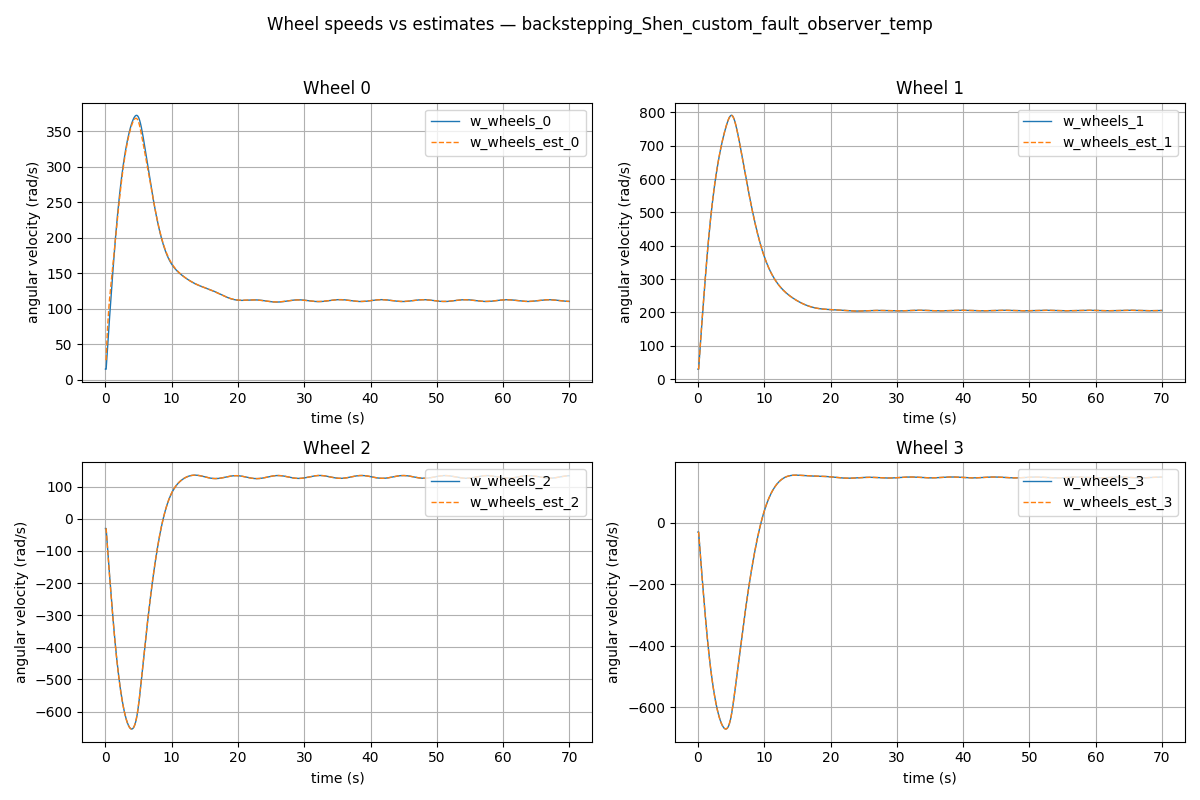

In [35]:
# plot actual vs estimated wheel speeds for all 4 wheels
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(4):
    axs[i].plot(df['time'], df[f'w_wheels_{i}'], label=f'w_wheels_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'w_wheels_est_{i}'], '--', label=f'w_wheels_est_{i}', linewidth=1)
    axs[i].set_xlabel('time (s)')
    axs[i].set_ylabel('angular velocity (rad/s)')
    axs[i].set_title(f'Wheel {i}')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

fig.suptitle(f'Wheel speeds vs estimates — {log_name}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

KeyError: 'T_ctr_wheels_0'

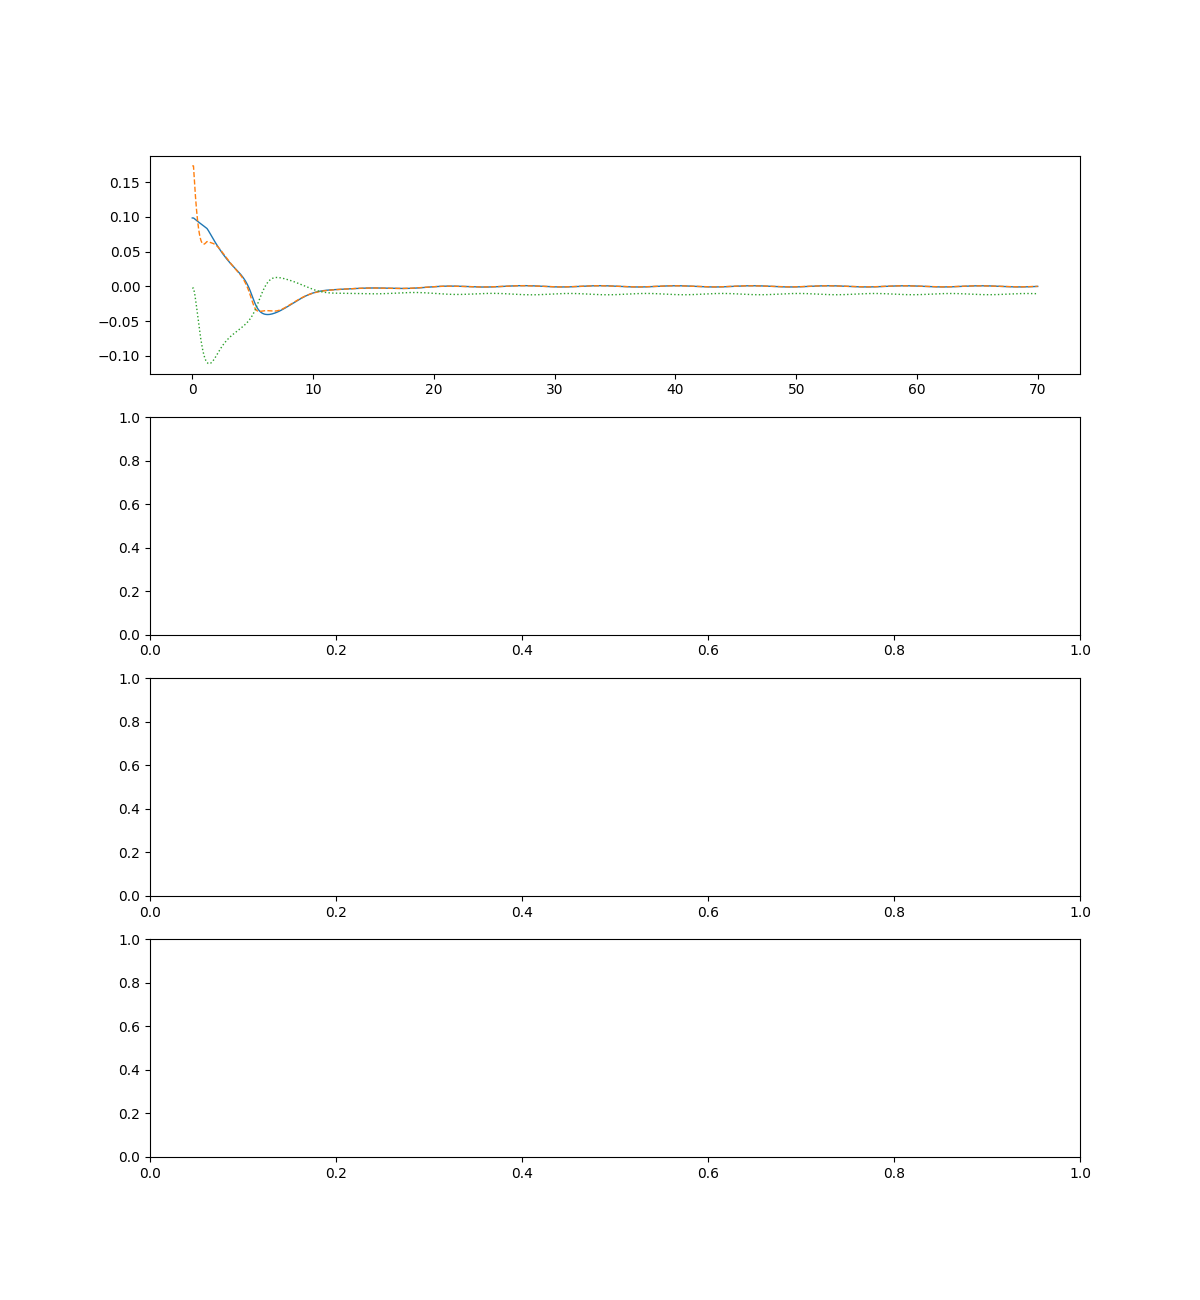

In [36]:
# plot actual vs estimated wheel torque for all 4 wheels
fig, axs = plt.subplots(4, 1, figsize=(12, 13))
axs = axs.flatten()

for i in range(4):
    axs[i].plot(df['time'], df[f'T_wheels_{i}'], label=f'T_wheels_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'T_wheels_est_{i}'], '--', label=f'T_wheels_est_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'f_wheels_est_{i}'], ':', label=f'f_wheels_est_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'T_ctr_wheels_{i}'], '-.', label=f'T_ctr_wheels_{i}', linewidth=1)
    # axs[i].plot(df['time'], df[f'u_wheels_{i}'], '-.', label=f'u_wheels_{i}', linewidth=1)
    axs[i].set_xlabel('time (s)')
    axs[i].set_ylabel('torque (N·m)')
    axs[i].set_title(f'Wheel {i}')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    axs2 = axs[i].twinx()
    axs2.set_ylabel('E_est (unitless)', color='tab:red')
    axs2.plot(df['time'], df[f'E_est_{i}'], ':', label=f'E_est{i}', linewidth=1)
    axs2.legend(loc='upper left')

fig.suptitle(f'Wheel torques vs estimates — {log_name}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

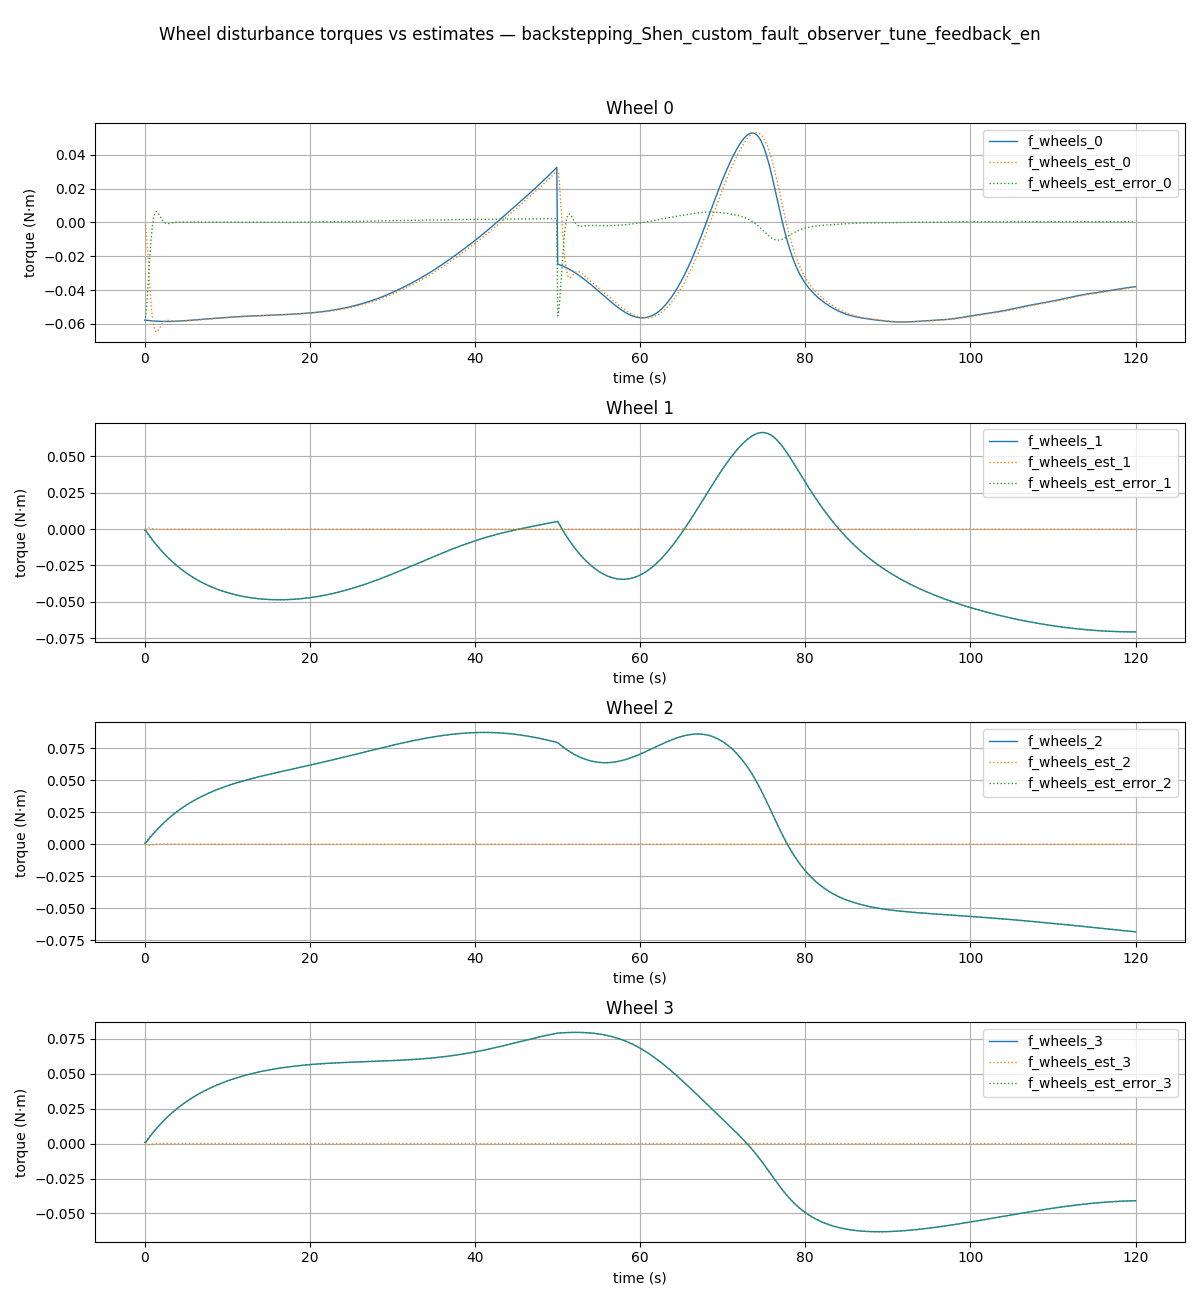

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(12, 13))
axs = axs.flatten()


for i in range(4):
    axs[i].plot(df['time'], df[f'f_wheels_{i}'], label=f'f_wheels_{i}', linewidth=1)
    axs[i].plot(df['time'], df[f'f_wheels_est_{i}'], ':', label=f'f_wheels_est_{i}', linewidth=1)
    df['f_wheels_est_error_'+ str(i)] = df['f_wheels_' + str(i)] - df['f_wheels_est_' + str(i)]
    axs[i].plot(df['time'], df[f'f_wheels_est_error_{i}'], ':', label=f'f_wheels_est_error_{i}', linewidth=1)
    axs[i].set_xlabel('time (s)')
    axs[i].set_ylabel('torque (N·m)')
    axs[i].set_title(f'Wheel {i}')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    # axs2 = axs[i].twinx()
    # axs2.set_ylabel('E_est (unitless)', color='tab:red')
    # axs2.plot(df['time'], df[f'E_est_{i}'], ':', label=f'E_est{i}', linewidth=1)
    # axs2.legend(loc='upper left')

fig.suptitle(f'Wheel disturbance torques vs estimates — {log_name}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

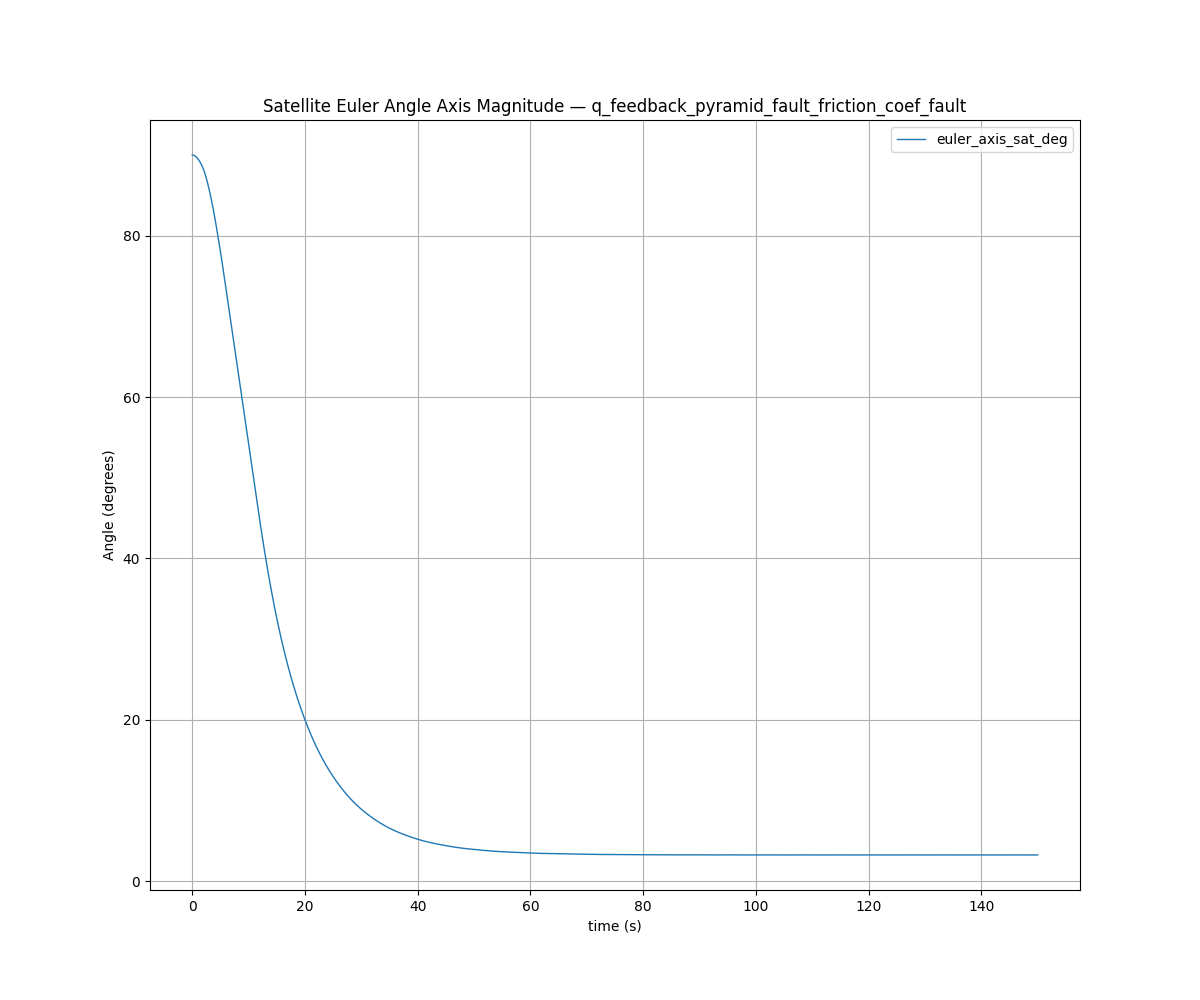

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
axs.plot(df['time'], df['euler_axis_sat_deg'], label='euler_axis_sat_deg', linewidth=1)
axs.set_xlabel('time (s)')
axs.set_ylabel('Angle (degrees)')
axs.set_title(f'Satellite Euler Angle Axis Magnitude — {log_name}')
axs.legend(loc='upper right')
axs.grid(True)

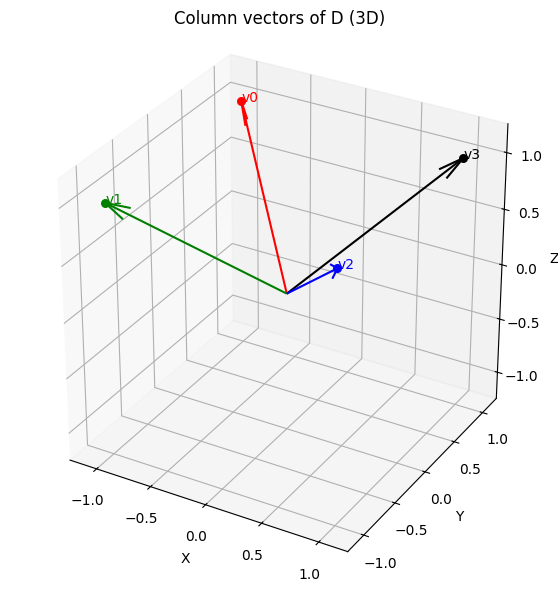

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# D = np.array([[0.9428,-0.4714,-0.4714,0],
#                 [0,0.8165,-0.8165,0],
#                 [-0.3333,-0.3333,-0.3333,1]])

D = np.array([[-1, -1, 1, 1],
              [1, -1, -1, 1],
              [1, 1, 1, 1]])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'k']

for idx in range(D.shape[1]):
    v = D[:, idx]
    ax.quiver(0, 0, 0, v[0], v[1], v[2],
              color=colors[idx % len(colors)],
              arrow_length_ratio=0.12, linewidth=1.5)
    ax.scatter([v[0]], [v[1]], [v[2]],
               color=colors[idx % len(colors)], s=30)
    ax.text(v[0], v[1], v[2], f'v{idx}', color=colors[idx % len(colors)])

max_val = np.max(np.abs(D)) * 1.2
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)
ax.set_zlim(-max_val, max_val)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Column vectors of D (3D)')
ax.set_box_aspect([1, 1, 1])
